In [1]:
import import_ipynb
from pycaret import classification
from pycaret.classification import setup
from load_dataset import *
from imports.imports_common_models_ML import *
from imports.imports_common_preprocessing import *
from imports.imports_common_metrics import *

importing Jupyter notebook from load_dataset.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_ML.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_preprocessing.ipynb


In [2]:
df = pd.DataFrame({'data': images, 'target': targets})

NameError: name 'metrics' is not defined

In [3]:
df.head()

,data,target
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild_Demented


In [4]:
df.head()

,data,target
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild_Demented


In [5]:
df.data.shape

(6400,)

In [6]:
df.shape

(6400, 2)

In [7]:
df.target.shape

(6400,)

In [8]:
df['target'].value_counts()

Non_Demented          3200
Very_Mild_Demented    2240
Mild_Demented          896
Moderate_Demented       64
Name: target, dtype: int64

In [9]:
df.info

<bound method DataFrame.info of                                                    data              target
0     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...        Non_Demented
1     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...        Non_Demented
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
4     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       Mild_Demented
...                                                 ...                 ...
6395  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...        Non_Demented
6396  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
6397  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
6398  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  Very_Mild_Demented
6399  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...       Mild_Demented

[6400 rows x 2 columns]>

In [10]:
def image_plot (images):
    for i in images.values:
        # cmap='gray'
        plt.imshow(i[0])
        plt.title(i[1], fontweight ="bold") 
        plt.show()

        # plot the pixel values
        plt.hist(i[0].ravel(), bins=50, density=True)
        plt.xlabel("pixel values")
        plt.ylabel("relative frequency")
        plt.title("distribution of pixels")
        plt.show()

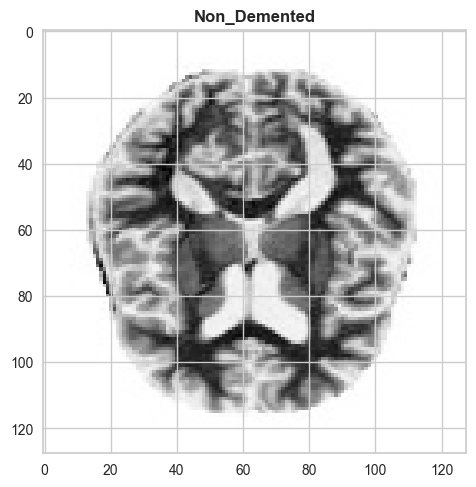

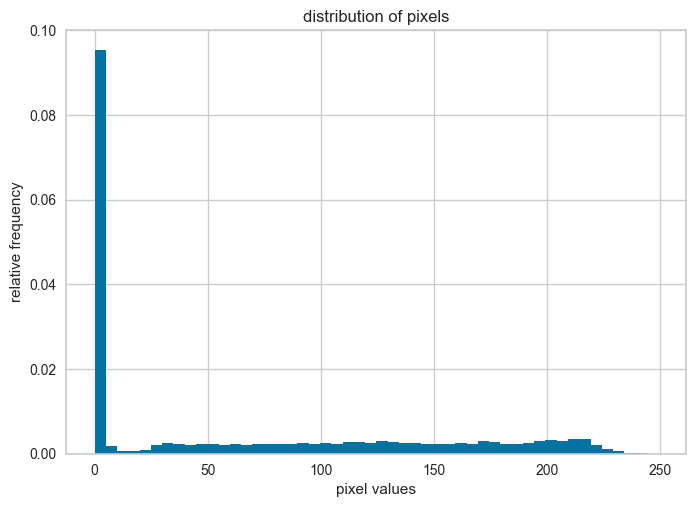

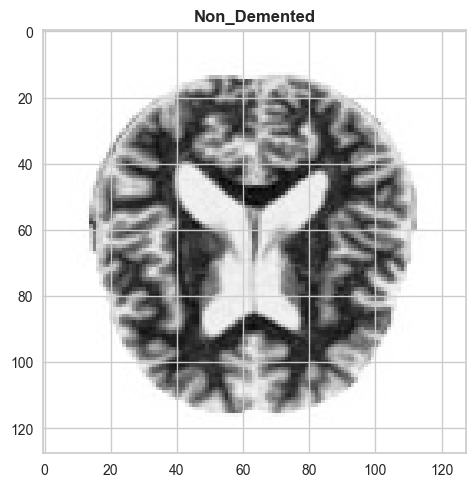

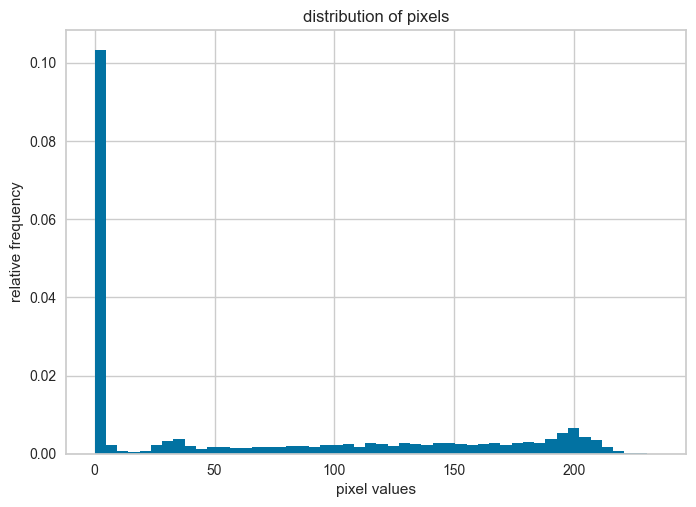

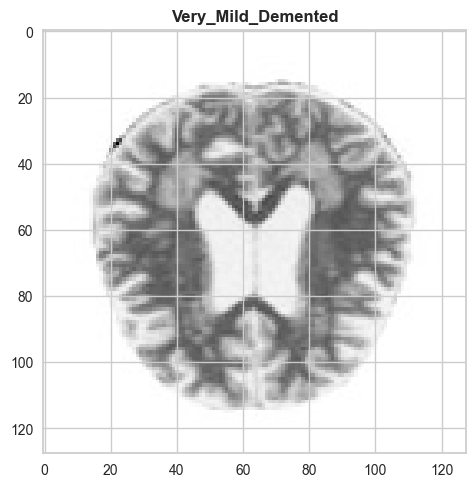

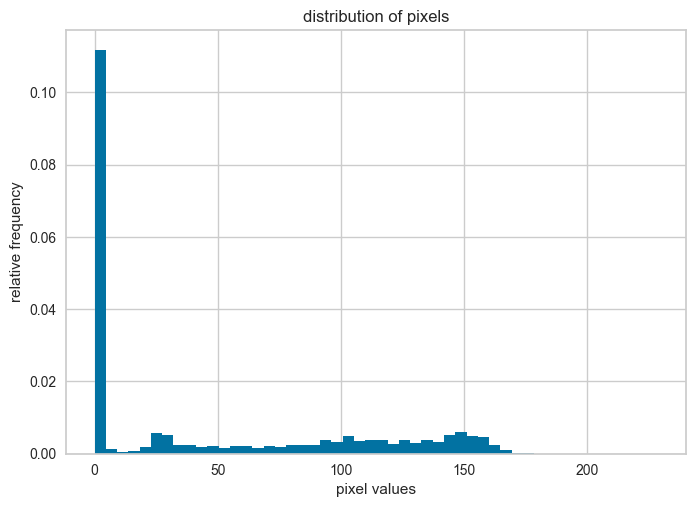

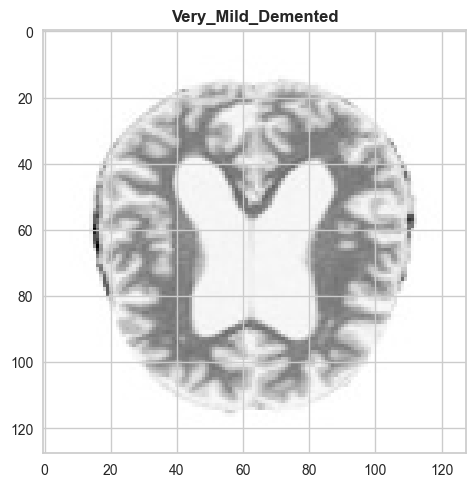

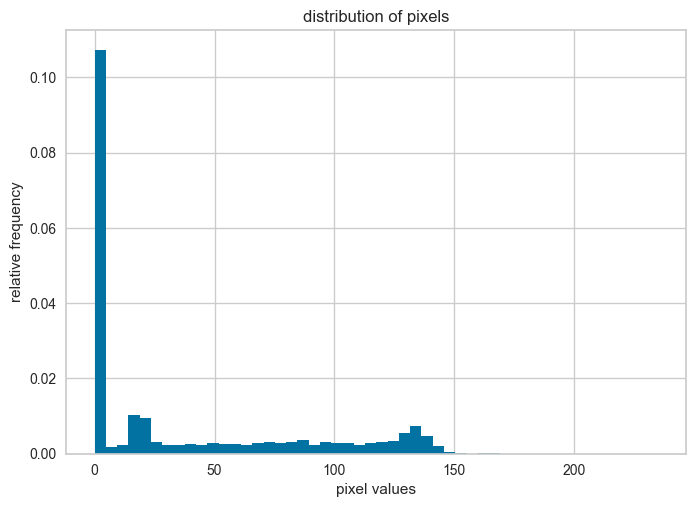

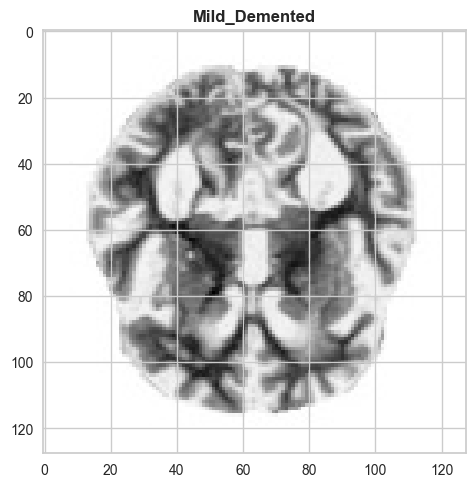

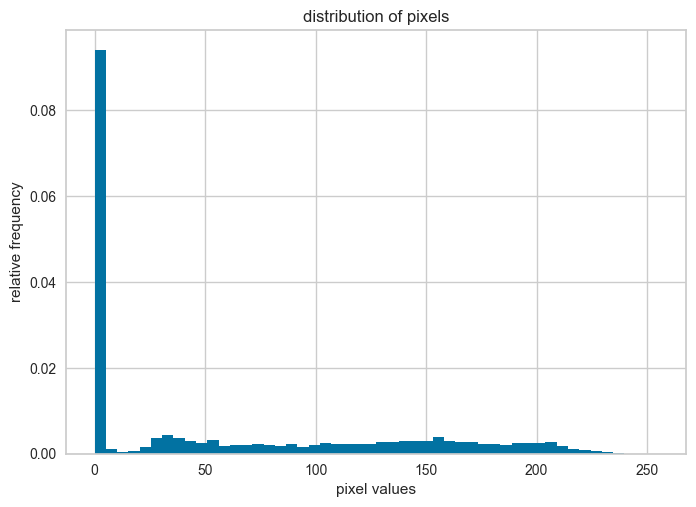

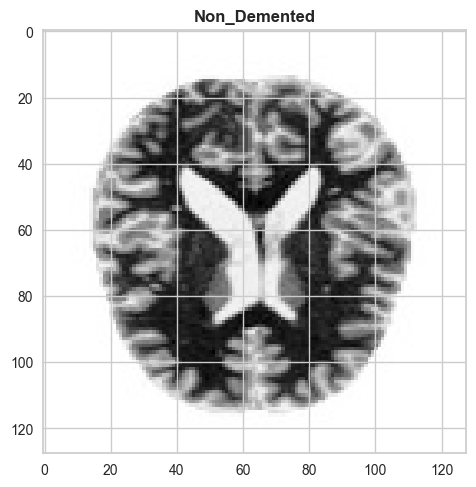

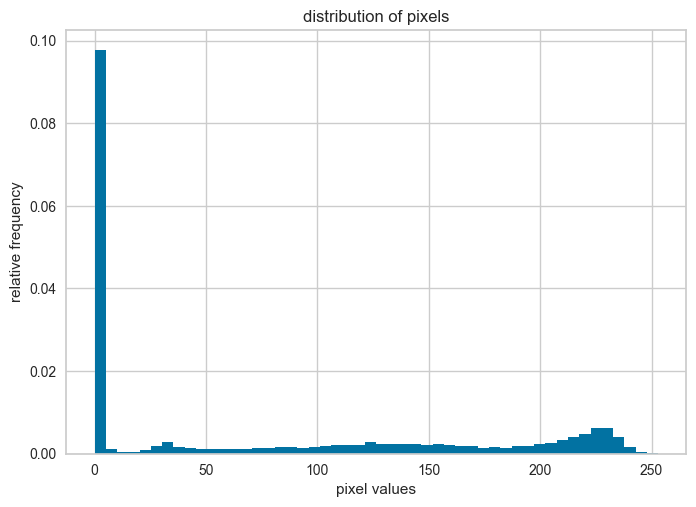

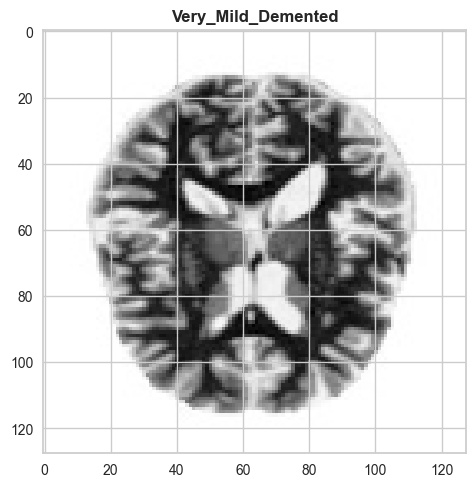

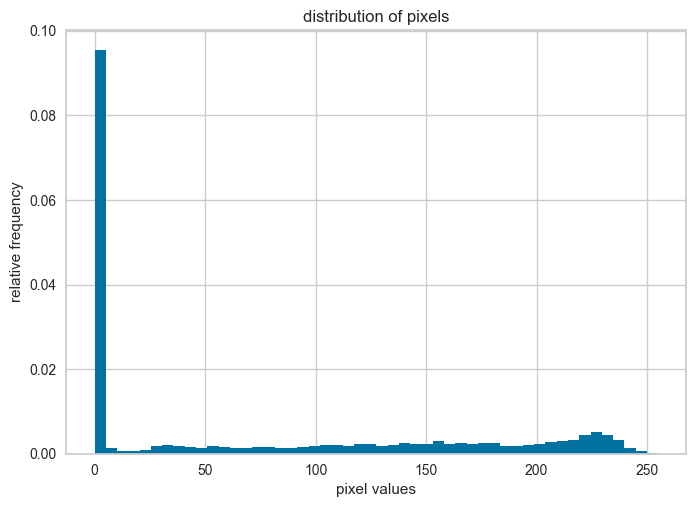

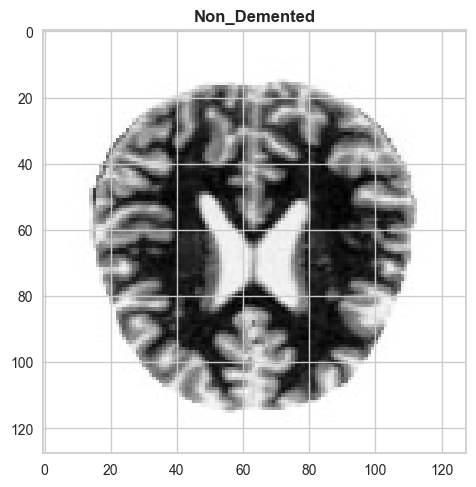

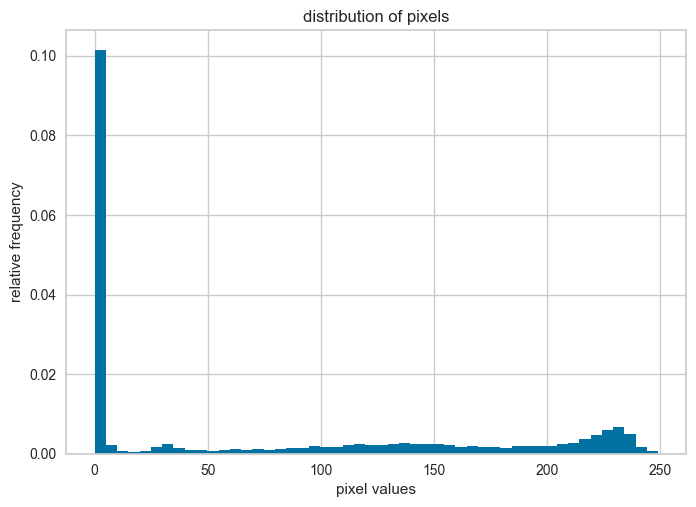

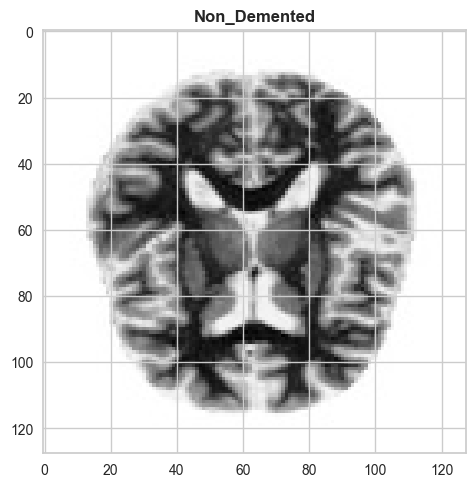

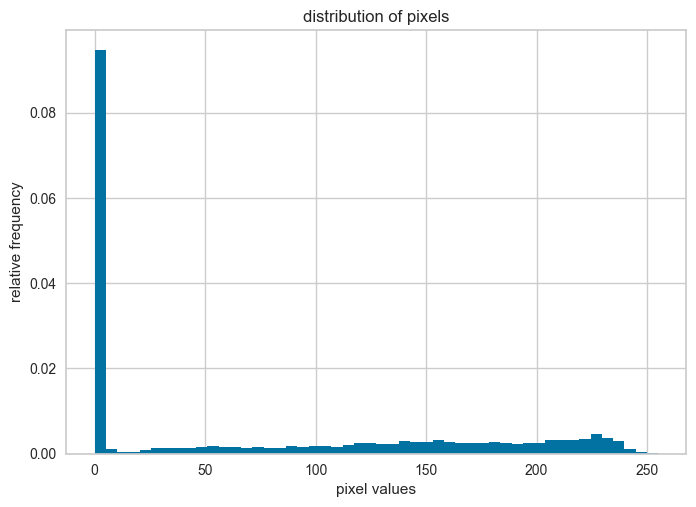

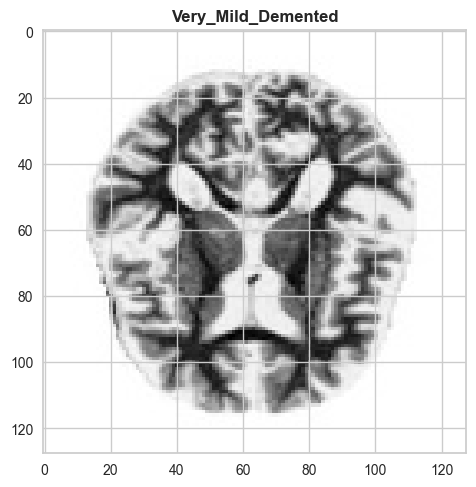

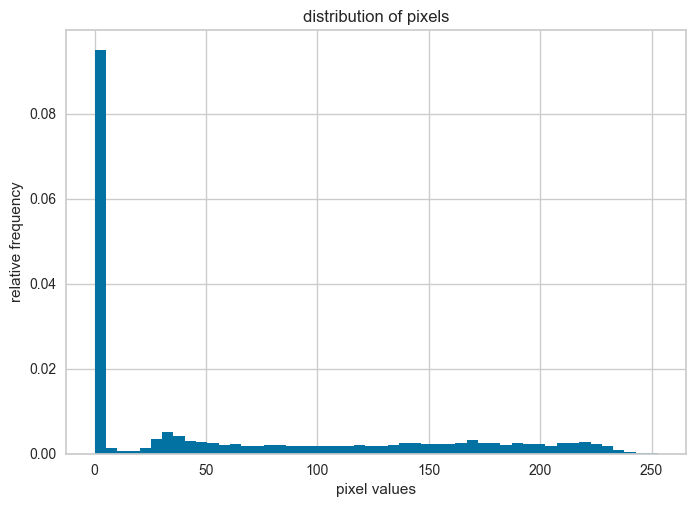

In [11]:
#df.loc[['data', 'target']]
data1 = df.iloc[0:10]
image_plot (data1)

In [12]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = SEED)

In [16]:
# Reshape X_train para (4480, 16384) - 128 * 128 = 16384
X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Criação do pandas.DataFrame
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

train_data = pd.concat([X_train, y_train], axis=1)

# Renomear as colunas de X_train e y_train
X_train = X_train.add_prefix('X_')
y_train = y_train.rename(columns={0: 'target'})

In [17]:
# Configuração do PyCaret para criação de modelos de classificação
s = classification.setup(data=train_data, target='target', session_id=123, normalize=True, fix_imbalance=True)

ValueError: Duplicate column names found in X.